<a href="https://colab.research.google.com/github/jcdevaney/data71200su24/blob/main/class3/data71200class3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
!pip install mglearn
import mglearn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.9 MB/s eta 0:00:00


# One-Hot-Encoding from Intro to Machine Learning book

In [ ]:
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

In [ ]:
# Checking string-encoded categorical data

print(data.gender.value_counts())

In [ ]:
# See result of pd.get_dummies

print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

In [ ]:
display(data_dummies.head())

In [ ]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

In [ ]:
# same thing but with scikit learn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [21]:
!git clone https://github.com/jcdevaney/data71200su24.git

from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=12, strategy='uniform')


fatal: destination path 'data71200su24' already exists and is not an empty directory.


In [19]:
grades_pd = pd.read_csv('/content/data71200su24/class3/grades.csv', header=None)

grades_pd = grades_pd.transpose()
grades_pd.head()

,0
0,82
1,83
2,92
3,93
4,72


In [22]:
kb.fit(grades_pd[0].values.reshape(-1, 1))
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([51., 55., 59., 63., 67., 71., 75., 79., 83., 87., 91., 95., 99.])]


In [23]:
import matplotlib.pyplot as plt

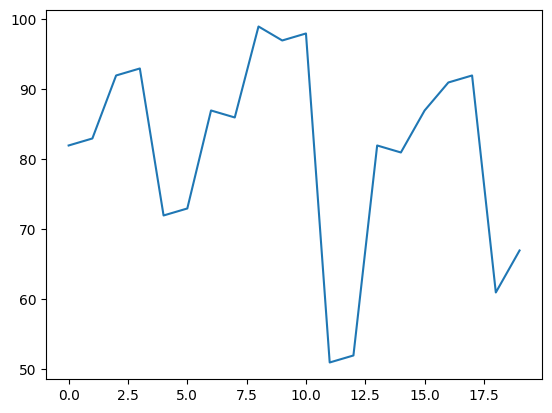

In [24]:
plt.plot(grades_pd[0].values.reshape(-1, 1))

In [28]:
print(grades_pd[0].values.reshape(-1, 1))

[[82]
 [83]
 [92]
 [93]
 [72]
 [73]
 [87]
 [86]
 [99]
 [97]
 [98]
 [51]
 [52]
 [82]
 [81]
 [87]
 [91]
 [92]
 [61]
 [67]]


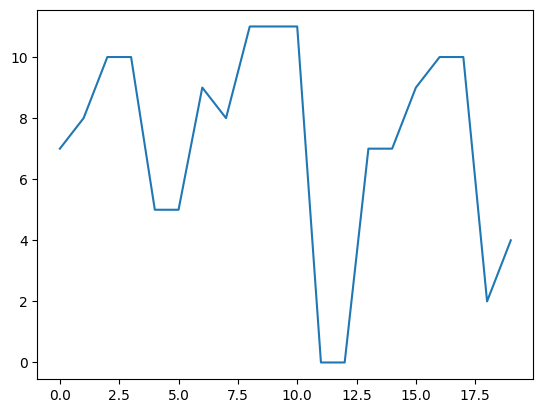

In [27]:
binned = kb.transform(grades_pd[0].values.reshape(-1, 1))
plt.plot(binned.argmax(1))

In [29]:
print(binned.argmax(1))

[[ 7]
 [ 8]
 [10]
 [10]
 [ 5]
 [ 5]
 [ 9]
 [ 8]
 [11]
 [11]
 [11]
 [ 0]
 [ 0]
 [ 7]
 [ 7]
 [ 9]
 [10]
 [10]
 [ 2]
 [ 4]]
